## Business Objectives
To develop a robust Machine Learning API using FastAPI to predict the onset of sepsis in patients. The API will leverage advanced algorithms to analyze patient data, such as vital signs, lab results, and medical history, to provide timely and accurate predictions. By enabling early detection, healthcare providers can intervene promptly, potentially saving lives and reducing the severity of sepsis cases. This project aims to enhance patient care, optimize resource allocation in healthcare facilities, and contribute to reducing the overall burden of sepsis on the healthcare system.

## Features and Target description

ID - Unique number to represent patient ID

PRG	- Plasma glucose

PL - Blood Work Result-1 (mu U/ml)

PR - Blood Pressure (mm Hg)

SK - Blood Work Result-2 (mm)

TS - Blood Work Result-3 (mu U/ml)

M11 - Body mass index (weight in kg/(height in m)^2

BD2 - Blood Work Result-4 (mu U/ml)

Age - patients age (years)

Insurance - If a patient holds a valid insurance card

Sepssis	- Target -	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

## Hypothesis 
Null Hypothesis - Body mass index does not have an effect on the occurrence or severity of sepsis in patients.
Alternate Hypothesis -  Body mass index is associated with the occurrence or severity of sepsis in patients.

## Analytical Questions
1. Is there a correlation between plasma glucose levels (PRG) and the development of sepsis in patients?
2. Does blood pressure (PR) have a significant impact on the occurrence of sepsis in patients?
3. How does body mass index (BMI) (M11) and Age relate to the likelihood of developing sepsis in patients?
4. Does age (Age) play a role in the development of sepsis in patients?



## Data Understanding

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, FunctionTransformer, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import joblib

In [173]:
# Load the dataset
df = pd.read_csv('Paitients_Files_Train.csv')
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [174]:
df.shape

(599, 11)

In [175]:
df = df.rename(columns={'PRG':'Plasma glucose','PL':'Blood Work Result-1','PR':'Blood Pressure',
                'SK':'Blood Work Result-2','TS':'Blood Work Result-3','M11':'Body mass index',
                'BD2':'Blood Work Result-4','Sepssis':'Sepsis'
                     })

In [176]:
df.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [177]:
# Check for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   599 non-null    object 
 1   Plasma glucose       599 non-null    int64  
 2   Blood Work Result-1  599 non-null    int64  
 3   Blood Pressure       599 non-null    int64  
 4   Blood Work Result-2  599 non-null    int64  
 5   Blood Work Result-3  599 non-null    int64  
 6   Body mass index      599 non-null    float64
 7   Blood Work Result-4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepsis               599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [178]:
# Calculate the percentage of every value in every column
percentage_dict = {}
for col in df.columns:
    value_counts = df[col].value_counts(normalize=True)
    percentage_dict[col] = pd.DataFrame({'value': value_counts.index, 'percentage': value_counts.values * 100})

# Display the percentages for each column
for col, percentages in percentage_dict.items():
    print(f"Column: {col}")
    print(percentages)
    print()

Column: ID
         value  percentage
0    ICU200010    0.166945
1    ICU200404    0.166945
2    ICU200406    0.166945
3    ICU200407    0.166945
4    ICU200408    0.166945
..         ...         ...
594  ICU200210    0.166945
595  ICU200211    0.166945
596  ICU200212    0.166945
597  ICU200213    0.166945
598  ICU200608    0.166945

[599 rows x 2 columns]

Column: Plasma glucose
    value  percentage
0       1   16.694491
1       0   15.525876
2       2   12.687813
3       3    9.849750
4       4    9.015025
5       5    8.180301
6       7    6.176962
7       6    6.176962
8       8    5.342237
9       9    3.338898
10     10    2.671119
11     12    1.335559
12     11    1.168614
13     13    1.168614
14     14    0.333890
15     15    0.166945
16     17    0.166945

Column: Blood Work Result-1
     value  percentage
0      100    2.504174
1       99    2.337229
2      125    1.836394
3       95    1.836394
4      105    1.836394
..     ...         ...
124     44    0.166945
125    1

In [179]:
# Replace zeros with nan value in the dataframe
#df.replace(0,np.nan, inplace=True)

# 

In [180]:
# Check for null values
df.isnull().sum()

ID                     0
Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
Sepsis                 0
dtype: int64

In [181]:
# Check for duplicates
df.duplicated().sum()

0

In [182]:
# Check for the summary statistics
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Plasma glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood Work Result-1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood Work Result-2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood Work Result-3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body mass index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood Work Result-4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


## Univariate Analysis


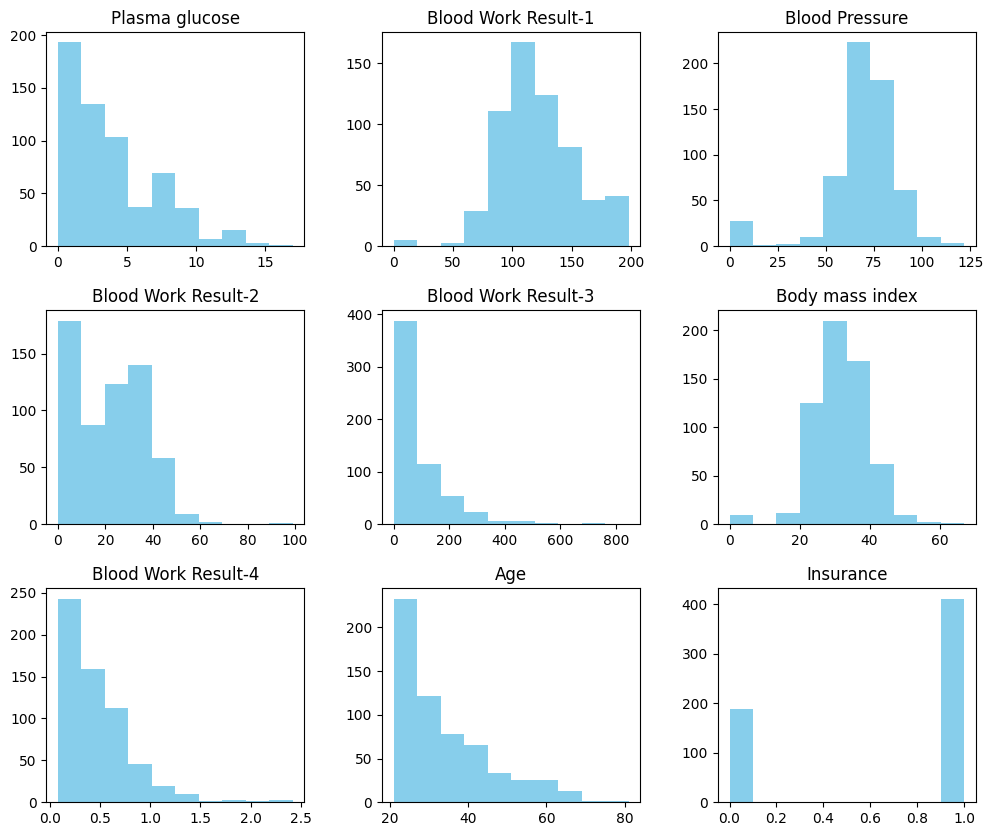

In [183]:
df.hist(figsize=(12,10),grid=False, bins=10, color='skyblue')
#plt.title('Univariate Analysis')
plt.show()

## Checking for possile outliers

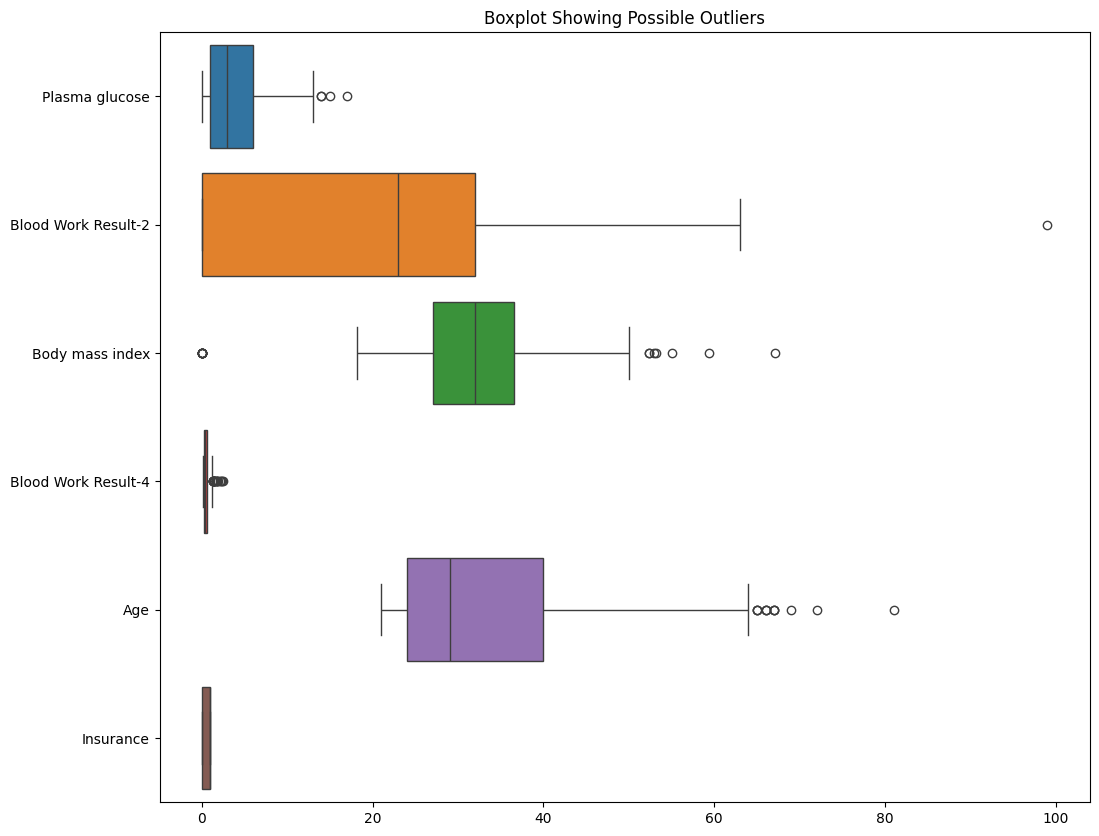

In [184]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df.drop(columns=['Blood Work Result-1','Blood Work Result-3','Blood Pressure']),orient='h')
plt.title('Boxplot Showing Possible Outliers')
plt.show()

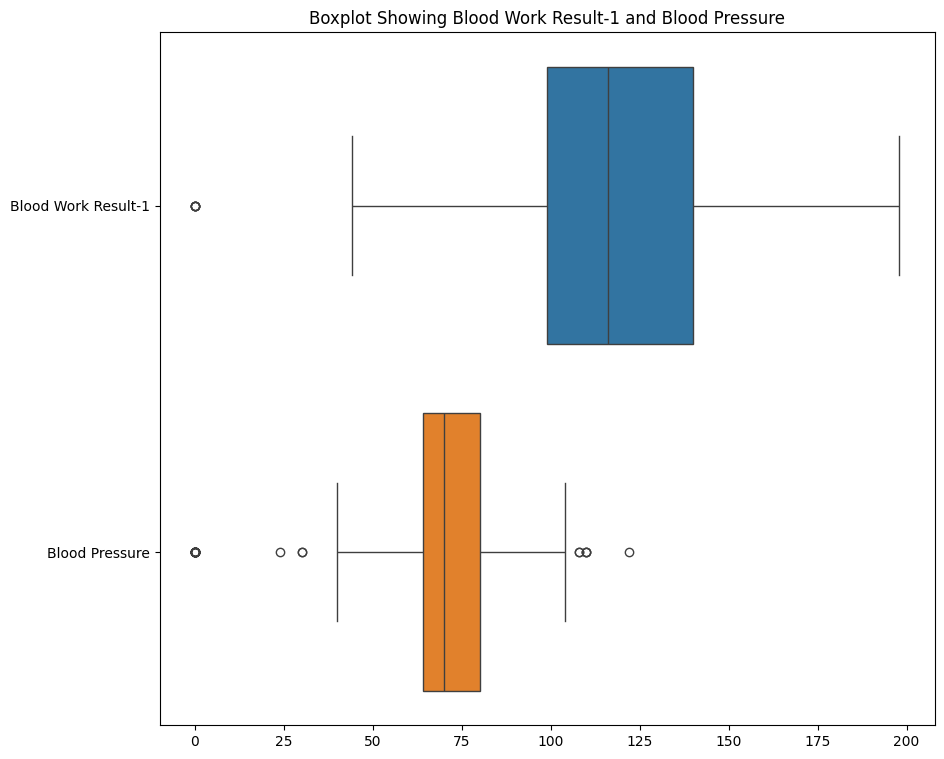

In [185]:
data = df[['Blood Work Result-1','Blood Pressure']]
plt.figure(figsize=(10,9))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot Showing Blood Work Result-1 and Blood Pressure')
plt.show()

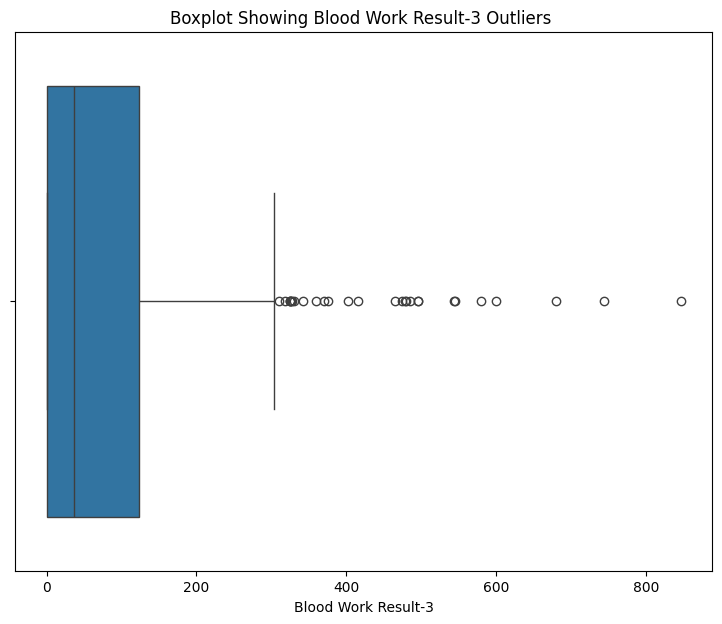

In [186]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df['Blood Work Result-3'], orient='h')
plt.title('Boxplot Showing Blood Work Result-3 Outliers ')
plt.show()

<Axes: ylabel='Density'>

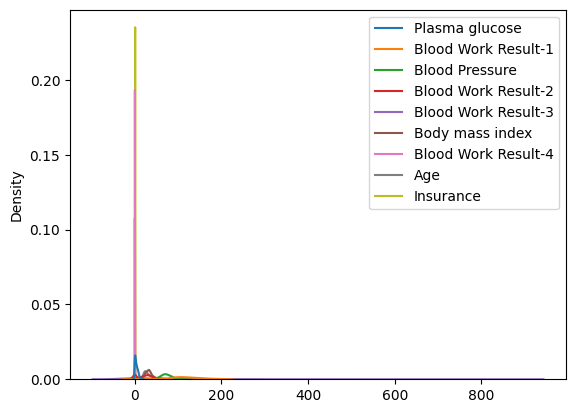

In [187]:
sns.kdeplot(data=df)

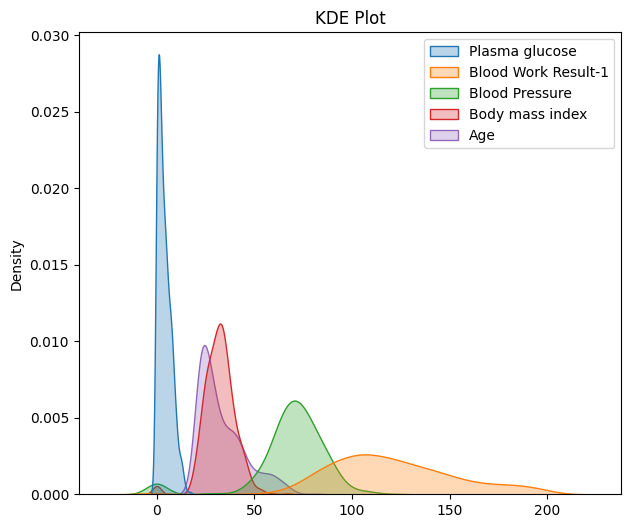

In [188]:
plt.figure(figsize=(7,6))
sns.kdeplot(data=df.drop(columns=['Blood Work Result-2','Insurance','Blood Work Result-4','Blood Work Result-3']),fill=True,alpha=0.3)
plt.title('KDE Plot')
plt.show()

<Axes: ylabel='Density'>

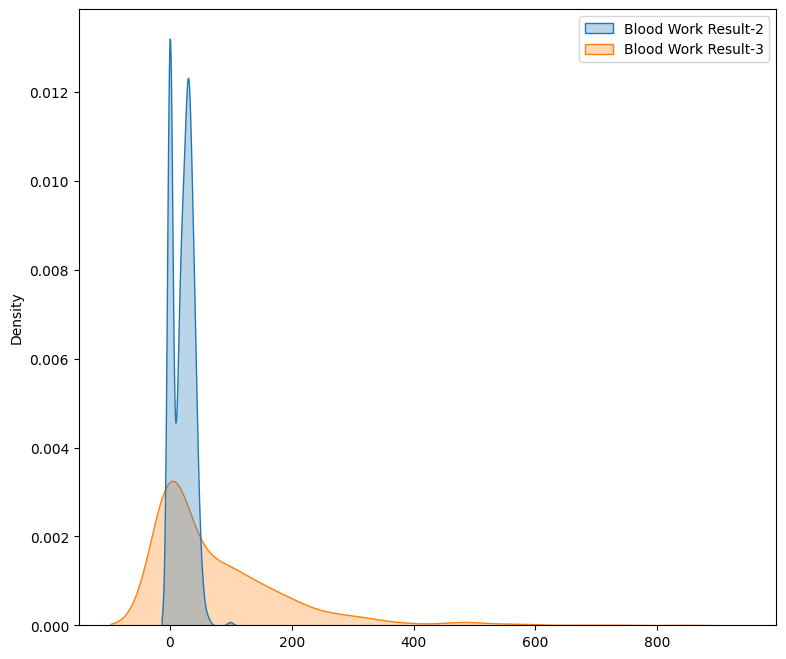

In [189]:
data = df[['Blood Work Result-2','Blood Work Result-3']]
plt.figure(figsize=(9,8))
sns.kdeplot(data=data,fill=True, alpha=0.3)

## Bivariate Analysis


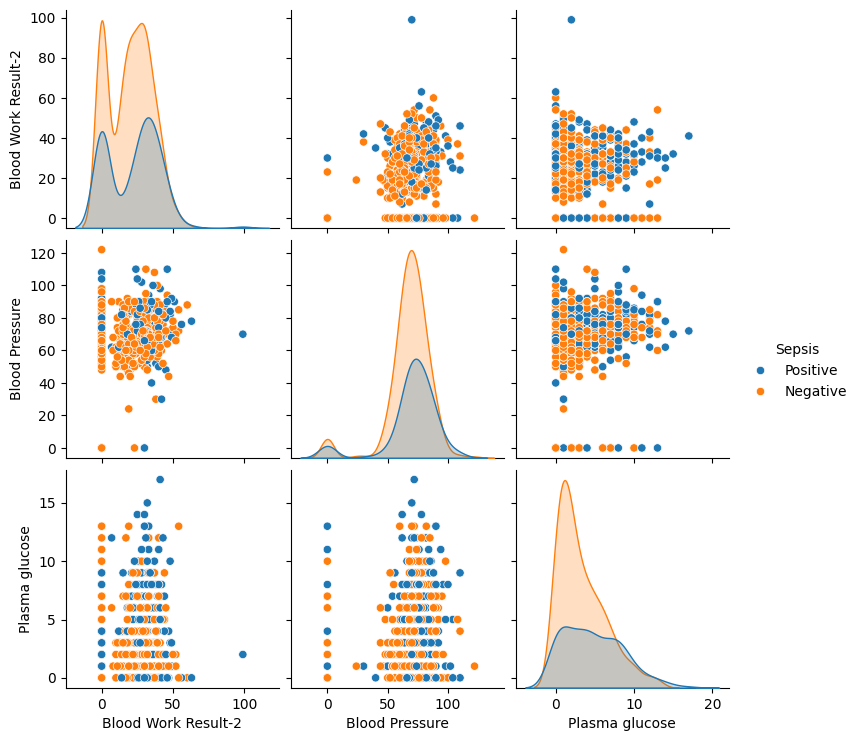

In [190]:
# Visualize the relationship between selected features and the target variable using pairplot
selected_features = df[['Blood Work Result-2','Blood Pressure','Plasma glucose','Sepsis']]
sns.pairplot(selected_features, hue='Sepsis')
plt.show()

In [191]:
# Visualize the correlation between the faetures
cor_features = df.corr(numeric_only=True)
cor_features


,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance
Plasma glucose,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
Blood Work Result-1,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
Blood Pressure,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
Blood Work Result-2,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
Blood Work Result-3,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
Body mass index,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
Blood Work Result-4,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


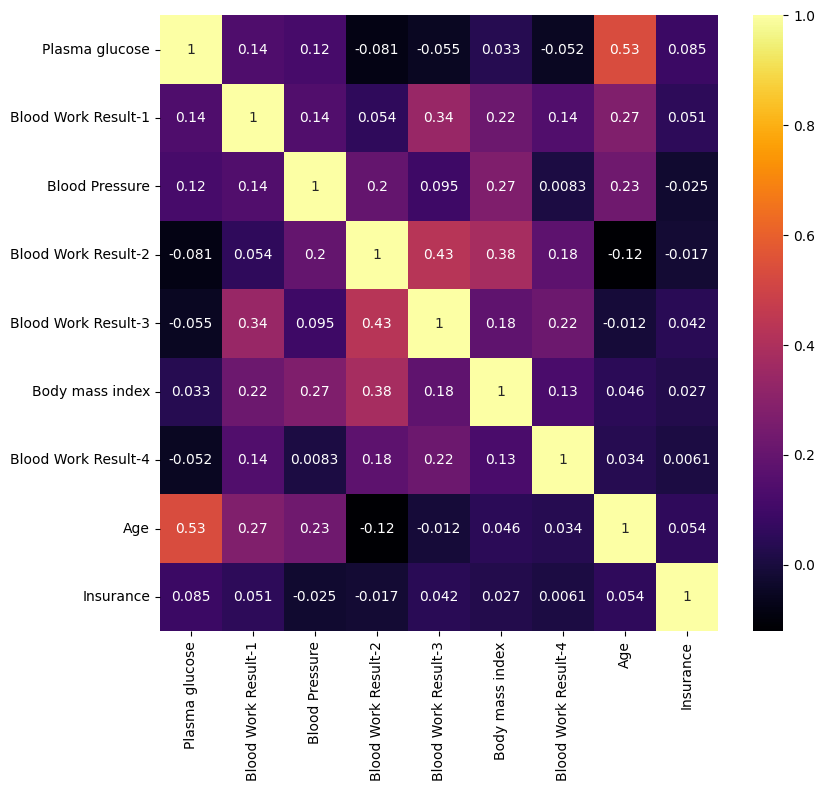

In [192]:
# Visualize the correlation using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(data=cor_features,annot=True, cmap='inferno')
plt.show()


## Multivariate Analysis

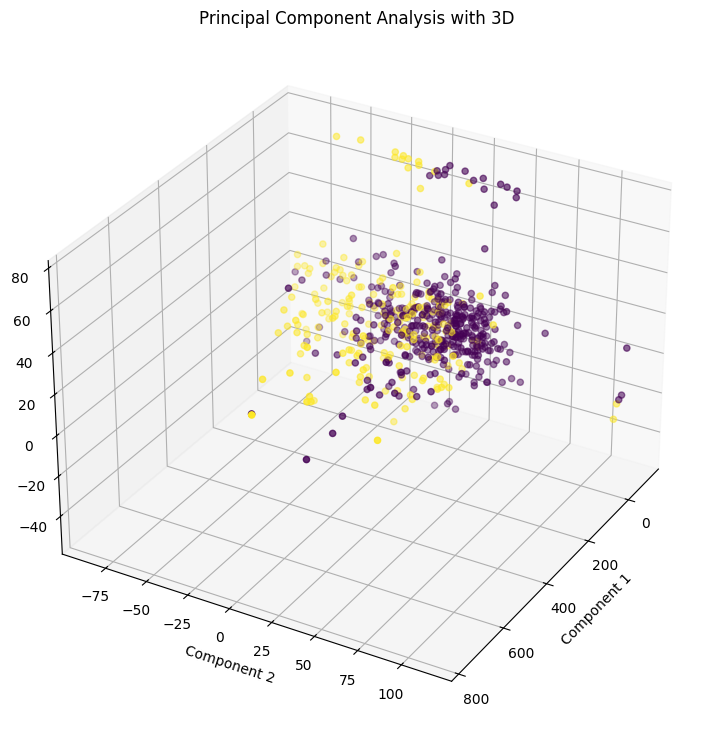

In [193]:
# Visualize the faetures in 3 dimension using Principal Component Analysis

# Encode the target variable to be used to color the 3d pca
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(df['Sepsis'])

# Select the numeric faetures for the pca
pca_data = df.select_dtypes(include='number')

# Create an instance of pca
pca = PCA(n_components=3)
pca_comp = pca.fit_transform(pca_data)

# To create the 3d plot
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(pca_comp[:,0], pca_comp[:,1],pca_comp[:,2], c=target_encoded)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3', labelpad=30)
ax.view_init(elev=30, azim=30)
ax.set_title('Principal Component Analysis with 3D')
plt.show()


In [194]:
pca.explained_variance_ratio_

array([0.88853352, 0.06222671, 0.02507273])

In [195]:
pca.components_

array([[-1.44602894e-03,  1.01459245e-01,  1.69035576e-02,
         5.91763877e-02,  9.92845602e-01,  1.31670702e-02,
         6.35396375e-04, -4.02653963e-04,  1.67115267e-04],
       [-2.22503808e-02, -9.74668599e-01, -1.22285317e-01,
         6.30832868e-02,  9.84366117e-02, -4.52728897e-02,
        -7.14231328e-04, -1.37304745e-01, -5.82324709e-04],
       [-1.85426858e-02,  1.23168514e-01, -9.30382564e-01,
        -2.94823312e-01,  2.24995184e-02, -1.31879778e-01,
        -6.31095284e-06, -1.18549114e-01,  8.87868864e-04]])

## Answering the Analytical Questions

1. Is there a correlation between plasma glucose levels (PRG) and the development of sepsis in patients?

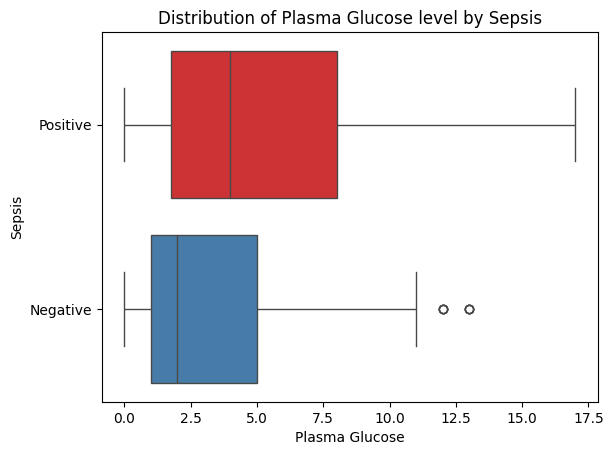

In [196]:
sns.boxplot(data=df, x='Plasma glucose',y='Sepsis',hue='Sepsis', palette='Set1')

plt.xlabel('Plasma Glucose')
plt.ylabel('Sepsis')
plt.title('Distribution of Plasma Glucose level by Sepsis')
plt.show()



###### Key Insight
###### Positive(blue) box represents patients with Sepsis while Negative(red) box represents Non-sepsis.

2. Does blood pressure (PR) have a significant impact on the occurrence of sepsis in patients?

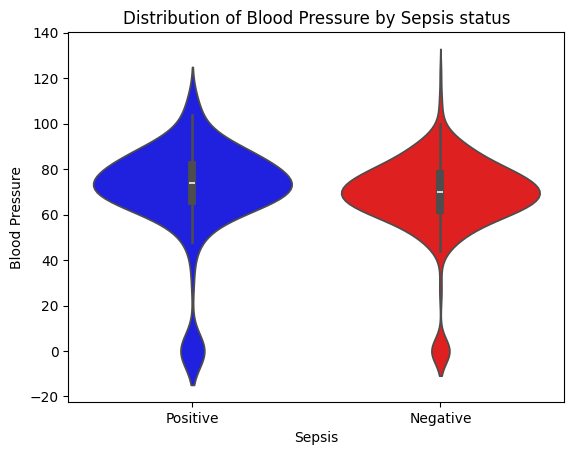

In [197]:
# Visualize the relationship between Blood Pressure and Sepsis
sns.violinplot(data=df, x='Sepsis', y='Blood Pressure', hue='Sepsis', 
               palette={'Positive':'blue','Negative':'red'})
plt.xlabel('Sepsis')
plt.ylabel('Blood Pressure')
plt.title('Distribution of Blood Pressure by Sepsis status')
plt.show()




###### Key Insight
###### Since there is no significant difference between the positive and negative violin plot shape and height, it suggests that blood pressure may not be a significant factor in determining the occurrence of sepsis in patients.

3. How does body mass index (BMI) (M11) and Age relate to the likelihood of developing sepsis in patients?

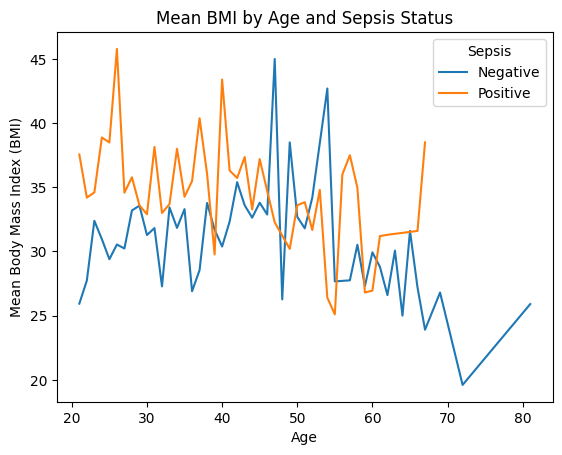

In [198]:
# Calculate the mean BMI for patients with and without sepsis across different age groups
mean_bmi_by_sepsis = df.groupby(['Sepsis', 'Age'])['Body mass index'].mean().reset_index()

# Visualize the mean BMI values using a line plot
sns.lineplot(data=mean_bmi_by_sepsis, x='Age', y='Body mass index', hue='Sepsis')

plt.xlabel('Age')
plt.ylabel('Mean Body Mass Index (BMI)')
plt.title('Mean BMI by Age and Sepsis Status')
plt.show()

###### Key Insight
###### Elderly patients with a moderate body mass index (BMI) are more likely to exhibit absence of sepsis.

#### Hypothesis Testing
Null Hypothesis - Body mass index does not have an effect on the occurrence or severity of sepsis in patients.
Alternate Hypothesis -  Body mass index is associated with the occurrence or severity of sepsis in patients.

In [199]:
bmi_sepsis = df[df['Sepsis']=='Positive']['Body mass index']
bmi_no_sepsis = df[df['Sepsis']=='Negative']['Body mass index']

t_stat, p_value = stats.ttest_ind(bmi_sepsis,bmi_no_sepsis)

print(f't_stat: {t_stat}')
print(f'p_value: {p_value}')

# Check if the p-value is less than 0.05
if p_value < 0.05:
    print('The difference in BMI between patients with and without sepsis is statistically significant')
else:
    print('There is no significant difference in BMI between patients with or without sepsis')


t_stat: 8.134971813407034
p_value: 2.3972519626645312e-15
The difference in BMI between patients with and without sepsis is statistically significant


### Data Preparation

In [200]:
df.rename(columns={'Plasma glucose':'Plasma_glucose','Blood Work Result-1':'Blood_Work_Result1',
                 'Blood Pressure':'Blood_Pressure','Blood Work Result-2':'Blood_Work_Result2',
                   'Blood Work Result-3':'Blood_Work_Result3','Body mass index':'Body_mass_index',
                  'Blood Work Result-4':'Blood_Work_Result4'},inplace=True)

In [201]:
# Create variables(x,y) for features and target variables
x = df.drop(columns=['Sepsis','ID'], axis=1)
y = df['Sepsis']

In [202]:
# Split the dataset into training and test variables
X_train,X_test,y_train,y_test = train_test_split(x, y, stratify=y, random_state=42)

In [203]:
# Create an input_features for the feature variables x
x_features = x.columns
x_features



Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object')

#### Encode Target variable

In [204]:
# Create an instance of the labelencoder
encoder = LabelEncoder()
y_train_encod = encoder.fit_transform(y_train)
y_test_encod = encoder.transform(y_test)

In [205]:
# Create a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='median'), x_features),
    ('scaler', RobustScaler(), x_features),
    ('log_transformer',FunctionTransformer(np.log1p), x_features)


    
])

### Modelling and Evaluation

In [206]:
# Create a table for the classfication report metrics
metrics_table = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1'])

# Initialize a dictionary to store the pipeline for the models
model_pipelines = {}


models = [
('XGBoost', XGBClassifier(random_state=42)),
('SVC',SVC(probability=True, random_state=42)),
('Naive_bayes', GaussianNB()),
('Gradient_boosting', GradientBoostingClassifier(random_state=42))

]
# Loop through the models to fit the training dataset
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif,k=6)),
        ('classifier', classifier)
    ])
    # Fit the training dataset to the pipeline
    pipeline.fit(X_train,y_train_encod)

    # Predict on the X_test dataset
    y_predict = pipeline.predict(X_test)

    # print(f'Report for {model_name}')
    # print(classification_report(y_predict, y_test_encod))
    # print('-'*40)
    model_metrics = classification_report(y_predict, y_test_encod, output_dict=True)

    # Store each pipeline in the dictionary
    model_pipelines[model_name] = pipeline

    accuracy = model_metrics['accuracy']
    precision = model_metrics['weighted avg']['precision']
    recall = model_metrics['weighted avg']['recall']
    f1 = model_metrics['weighted avg']['f1-score']

    # Add the values above to the classification report table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1]
    
# Display the metrics_table
metrics_table.sort_values('f1',ascending=True)




,model_name,accuracy,precision,recall,f1
3,Gradient_boosting,0.700000,0.698744,0.700000,0.699341
2,Naive_bayes,0.726667,0.735288,0.726667,0.730169
0,XGBoost,0.726667,0.752109,0.726667,0.735569
1,SVC,0.740000,0.788305,0.740000,0.755027


#### Balance the Dataset Using RandomSampler

In [207]:
sampler = RandomOverSampler()
X_train_sampled, y_train_sampled = sampler.fit_resample(X_train,y_train_encod)

In [208]:
# Check if the target variable  are balanced
pd.DataFrame(y_train_sampled).value_counts()

0
0    293
1    293
Name: count, dtype: int64

#### Train the models with balanced dataset for comparison with the unbalanced dataset

In [209]:
models = [
('XGBoost', XGBClassifier(random_state=42)),
('SVC',SVC(probability=True, random_state=42)),
('Naive_bayes', GaussianNB()),
('Gradient_boosting', GradientBoostingClassifier(random_state=42))

]

pipeline = {}
individual_models = {}

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif,k=6)),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train_sampled,y_train_sampled)
    y_predict = pipeline.predict(X_test)
    print(f'Report for {model_name}')
    print(classification_report(y_predict, y_test_encod))
    print('-'*40)

Report for XGBoost
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        96
           1       0.65      0.63      0.64        54

    accuracy                           0.75       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.74      0.75      0.75       150

----------------------------------------
Report for SVC
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        90
           1       0.67      0.58      0.62        60

    accuracy                           0.72       150
   macro avg       0.71      0.70      0.70       150
weighted avg       0.72      0.72      0.72       150

----------------------------------------
Report for Naive_bayes
              precision    recall  f1-score   support

           0       0.63      0.83      0.72        75
           1       0.75      0.52      0.61        75

    accuracy                           0.67

Report for Gradient_boosting
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        92
           1       0.67      0.60      0.64        58

    accuracy                           0.73       150
   macro avg       0.72      0.71      0.71       150
weighted avg       0.73      0.73      0.73       150

----------------------------------------


In [210]:


# models = [
#     ('XGBoost', XGBClassifier(random_state=42)),
#     ('SVC', SVC(probability=True, random_state=42)),
#     ('Naive_bayes', GaussianNB()),
#     ('Gradient_boosting', GradientBoostingClassifier(random_state=42))
# ]

# pipeline = {}
# individual_models = {}

# for model_name, classifier in models:
#     # Create the pipeline
#     pipe = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('feature_selection', SelectKBest(mutual_info_classif, k=6)),
#         ('classifier', classifier)
#     ])
    
#     # Fit the pipeline
#     pipe.fit(X_train_sampled, y_train_sampled)
    
#     # Store the pipeline
#     pipeline[model_name] = pipe
    
#     # Store the individual model for hyperparameter tuning 
#     individual_models[model_name] = pipe.named_steps['classifier']

# # Print pipelines and individual models
# for model_name, pipe in pipeline.items():
#     print(f'Pipeline for {model_name}:\n{pipe}')

# for model_name, model in individual_models.items():
#     print(f'Individual model for {model_name}:\n{model}')


#### XGBOOST PIPELINE

In [211]:
xgboost_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif,k=6)),
        ('xgboost', XGBClassifier(random_state=42))

])

xgboost_pipeline.fit(X_train_sampled, y_train_sampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_Re...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

#### SVC Pipeline

In [212]:
svc_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif, k=6)),
        ('svc', SVC(probability=True, random_state=42))

])

svc_pipeline.fit(X_train_sampled,y_train_sampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_Re...
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=6,
                             score_func=<function mutual_info_classif at 0x0000016A1E3559E0>)),
                ('svc', SVC(probability=True, random_state=42))])

#### Naive Bayes Pipeline

In [213]:
naive_bayes_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif, k=6)),
        ('naive_bayes', GaussianNB())

])
naive_bayes_pipeline.fit(X_train_sampled,y_train_sampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_Re...
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=6,
                             score_func=<function mutual_info_classif at 0x0000016A1E3559E0>)),
                ('naive_bayes', GaussianNB())])

#### Gradient Boosting Pipeline

In [214]:
gradientboost_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif,k=6)),
        ('gradient_boosting', GradientBoostingClassifier(random_state=42))

])
gradientboost_pipeline.fit(X_train_sampled,y_train_sampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['Plasma_glucose', 'Blood_Work_Re...
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['Plasma_glucose', 'Blood_Work_Result1', 'Blood_Pressure',
       'Blood_Work_Result2', 'Blood_Work_Result3', 'Body_mass_index',
       'Blood_Work_Result4', 'Age', 'Insurance'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=6,
                             score_func=<function mutual_info_classif at 0x0000016A1E3559E0>)),
                ('gradient_boosting',
                 GradientBoostingClassifier(random_state=42))])

#### Create a Confusion Matrix using GradientBossting Pipeline

In [215]:
confusion_matx_pred = gradientboost_pipeline.predict(X_test)
conf_matrix = confusion_matrix(confusion_matx_pred,y_test_encod)
conf_matrix

array([[75, 17],
       [23, 35]], dtype=int64)

<Axes: >

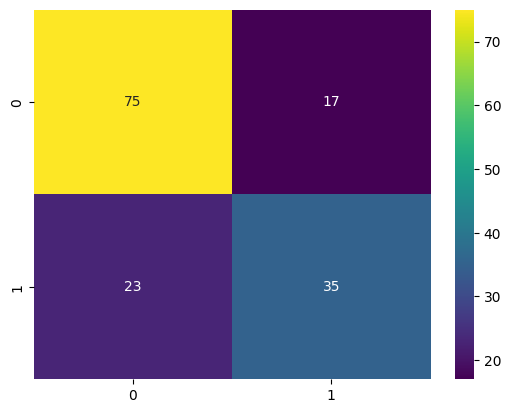

In [216]:
# Use heatmap to visualize the confusion matrix

sns.heatmap(data=conf_matrix, annot=True,fmt ='d', cmap='viridis')


#### ROC CURVE and AUC

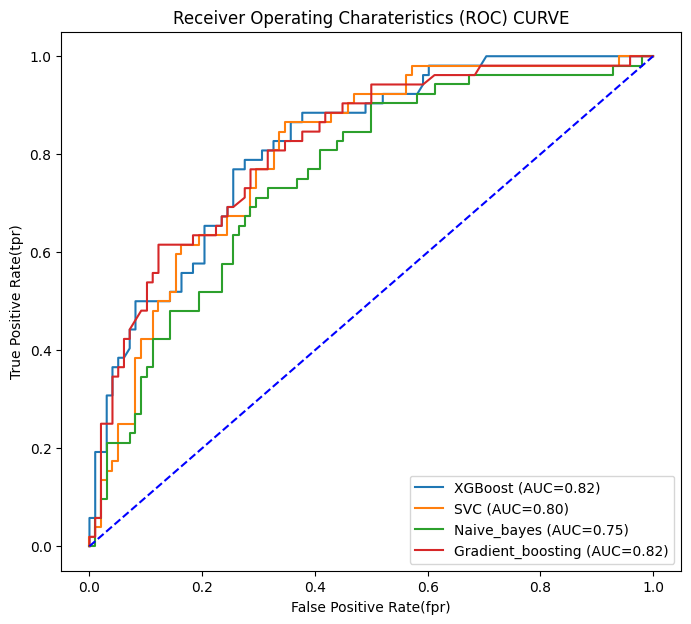

In [217]:
fig, axes = plt.subplots(figsize=(8,7))
roc_data = {} # It stores ROC CURVE data for each model

for model_name, classifier in models:
    pipeline =Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(mutual_info_classif, k=6)),
            ('classifier',classifier)
        
    ])

    pipeline.fit(X_train_sampled,y_train_sampled)
    y_prob_pred = pipeline.predict_proba(X_test)[:,1] # To generate predicted probability for the positive class(1)

    fpr, tpr, threshold = roc_curve(y_test_encod, y_prob_pred)

    roc_auc = auc(fpr,tpr)  # To calculate area under the ROC curve

    roc_curve_metric = pd.DataFrame({'False Positive Rate':fpr,'True Positive Rate':tpr, 'Threshold':threshold})

    roc_data[model_name] = roc_curve_metric # It stores the roc_curve_metric in the dictionary with model_name as key name

    axes.plot(fpr,tpr,label=f'{model_name} (AUC={roc_auc:.2f})')

axes.plot([0,1],[0,1], color='blue', linestyle='--')
axes.set_xlabel('False Positive Rate(fpr)')
axes.set_ylabel('True Positive Rate(tpr)')
axes.set_title('Receiver Operating Charateristics (ROC) CURVE')
axes.legend(loc='lower right')
plt.show()


In [218]:
roc_data['Gradient_boosting']

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.019231,0.972645
2,0.010204,0.019231,0.971808
3,0.010204,0.057692,0.959598
4,0.020408,0.057692,0.952855
...,...,...,...
69,0.948980,0.980769,0.016662
70,0.959184,0.980769,0.016181
71,0.959184,1.000000,0.015644
72,0.979592,1.000000,0.015465


In [219]:
# Set threshold to be 0.6 to i,prove the performance of the model
threshold = 0.6
y_pred_thres_prob = gradientboost_pipeline.predict_proba(X_test)[:,1]

binary_prediction = (y_pred_thres_prob >= threshold)
conf_matrix_thres = confusion_matrix(binary_prediction, y_test_encod)
conf_matrix_thres

array([[80, 20],
       [18, 32]], dtype=int64)

<Axes: >

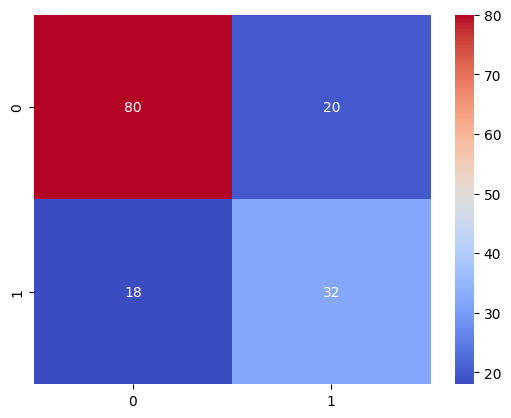

In [220]:
sns.heatmap(data=conf_matrix_thres, annot=True,fmt='d',cmap='coolwarm')

#### Model Persistence

In [223]:
joblib.dump(gradientboost_pipeline,"./models/gradientboosting_model.joblib")
joblib.dump(naive_bayes_pipeline,"./models/naive_bayes_model.joblib")
joblib.dump(svc_pipeline,"./models/svc_model.joblib")
joblib.dump(xgboost_pipeline,"./models/xgboost_model.joblib")
joblib.dump(encoder,"./models/label_encoder.joblib")


['./models/label_encoder.joblib']